### Importing required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset using pandas.

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.shape

(16598, 11)

##### This dataset has 16598 Rows and 11 Columns.

### Displaying first 5 rows of dataset.

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Displaying last 5 rows of dataset.

In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


### Information about dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Checking what coulumns are there in dataset.

In [8]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## DATA CLEANING

### Checking if the data has null values or not.

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          1
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Checking the percentage of missing values in each column.

In [10]:
df.isnull().sum()/df.shape[0]*100

Rank            0.000000
Name            0.000000
Platform        0.006025
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Dropping the null values will not show effect on the data.

### Missing Value Inspection

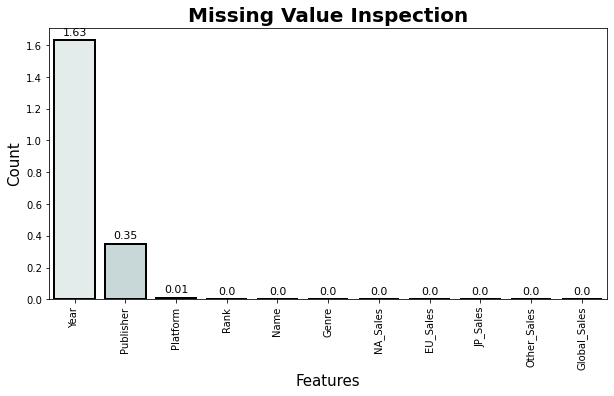

In [11]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

#### Dropping null values.

In [12]:
df1 = df.dropna()

#### Checking if the dataset having null values or not after removing null values.

In [13]:
df1.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Mising value inspection:after replacing null values.

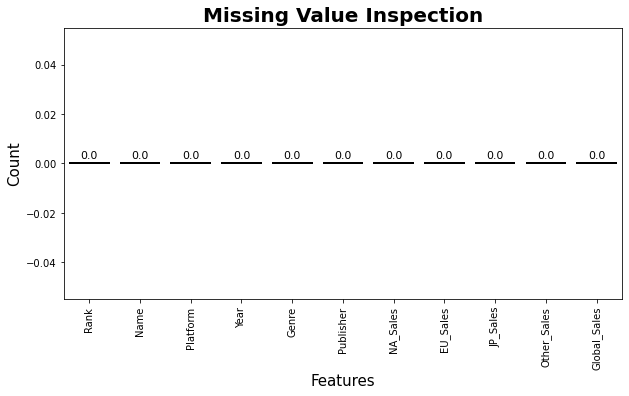

In [14]:
Value_Missing = df1.isnull().sum().sort_values(ascending = False)
percent_missing = (df1.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

Hence,there are no null values we can proceed.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16597 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df1.mean()

Rank            8290.693616
Year            2006.407060
NA_Sales           0.265216
EU_Sales           0.147713
JP_Sales           0.078838
Other_Sales        0.048424
Global_Sales       0.540464
dtype: float64

#### Median value of a data set.

In [17]:
df1.median()

Rank            8292.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

#### Values that appear most often.

#### How dispersed the data is in relation to the mean.

In [18]:
df1.std()

Rank            4792.370856
Year               5.829456
NA_Sales           0.820619
EU_Sales           0.509313
JP_Sales           0.311888
Other_Sales        0.190089
Global_Sales       1.566357
dtype: float64

#### Statistical measurement of the spread between numbers.

In [19]:
df1.var()

Rank            2.296682e+07
Year            3.398255e+01
NA_Sales        6.734154e-01
EU_Sales        2.593998e-01
JP_Sales        9.727441e-02
Other_Sales     3.613365e-02
Global_Sales    2.453476e+00
dtype: float64

## Finding most selling games w.r.t genre.

<AxesSubplot:title={'center':'MOST SELLING GAMES BY CATEGORY'}, xlabel='Genre', ylabel='count'>

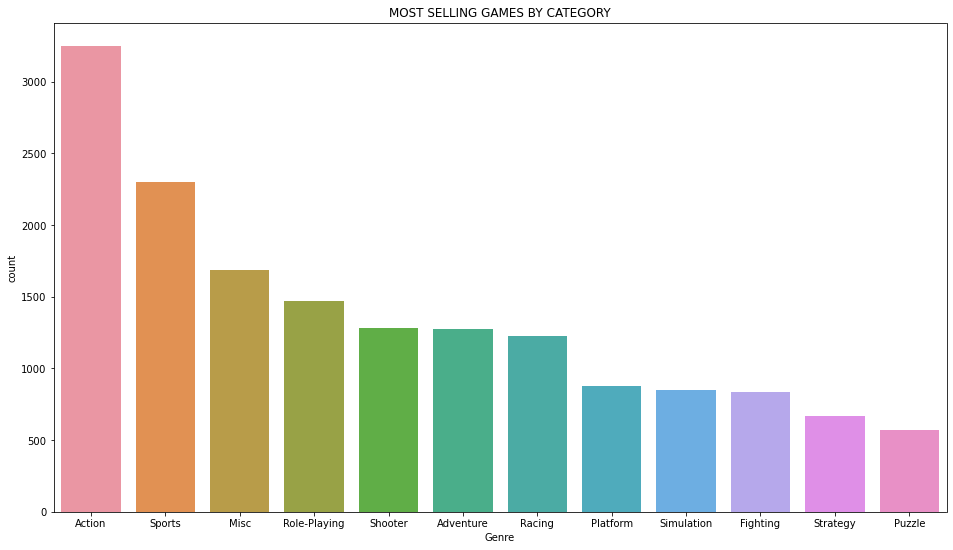

In [20]:
plt.figure(figsize=(16,9))
plt.title('MOST SELLING GAMES BY CATEGORY')
sns.countplot(data=df1, x = 'Genre', order = df1['Genre'].value_counts().index)


#### The games of Action genre has the highest sales and games of Puzzle genre has the least sales.

## Let us see which "year" has the most releases.

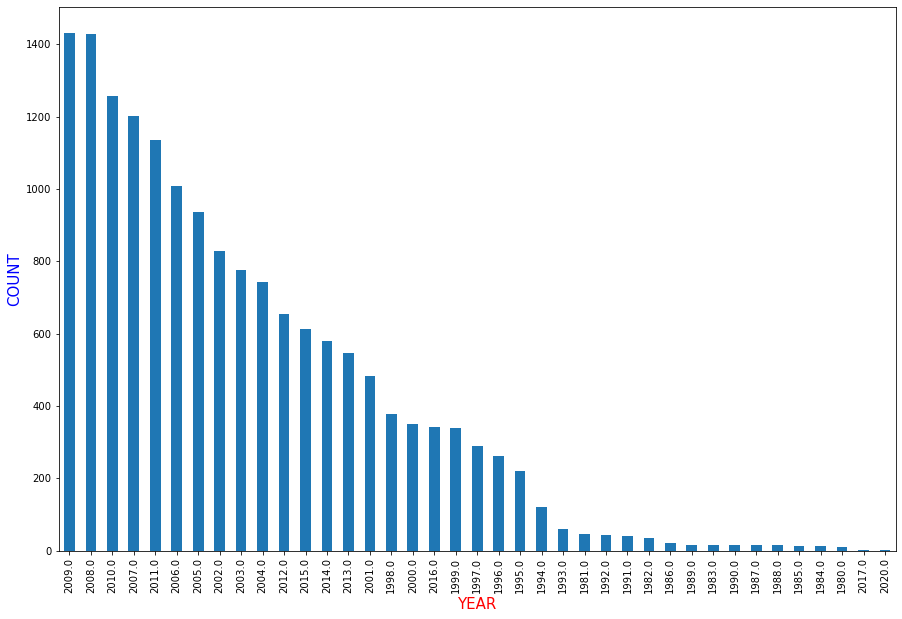

In [21]:
df1['Year'].value_counts().plot(kind = "bar",figsize=(15,10))
plt.xlabel("YEAR",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.show()

#### From the above plotting of bargraph we can see that "2009","2008" has the highest releases.

## Checking which platform has more number of games.

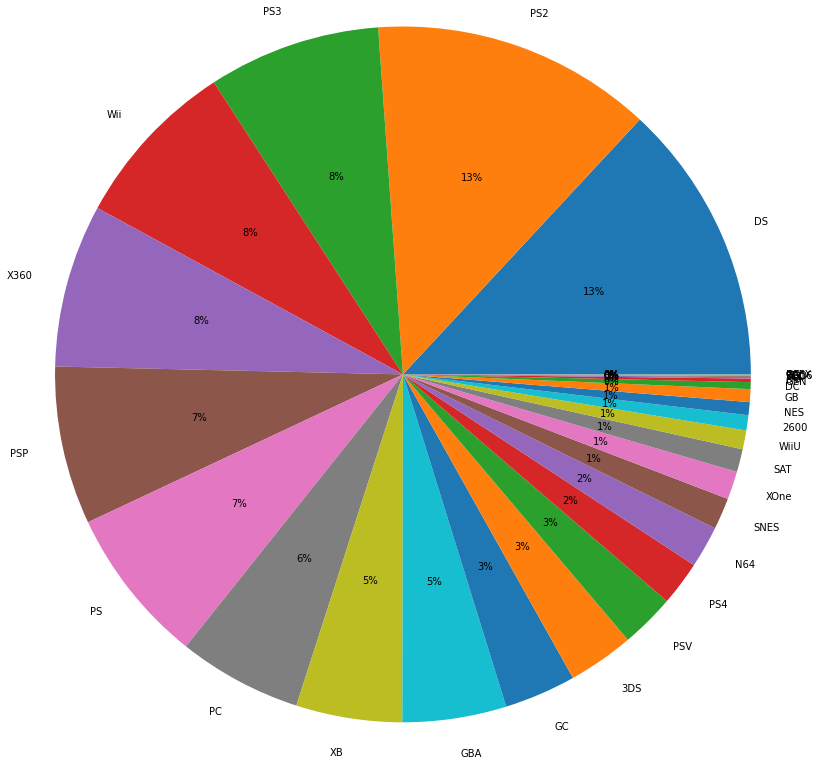

In [22]:
x= df1['Platform'].value_counts()
plt.pie(x, labels=x.index, autopct="%.0f%%",radius=4);

#### Hence, we can see that platforms "DS","PS2" has the highest number of games and then platforms like ""PS3 ,"WII","X360" has the 2nd highest number of games.

# Analyzing which genre plays major role in each type of sales. 

### 1) North-America

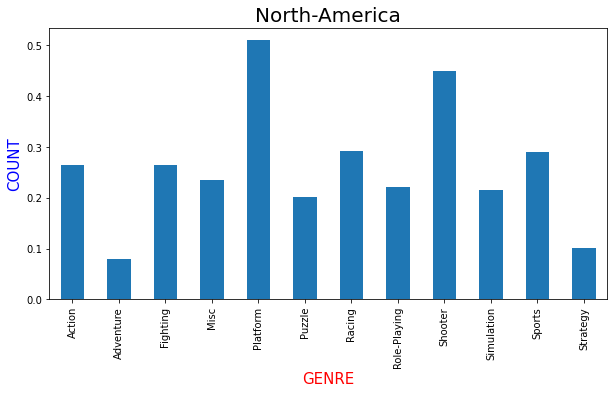

In [23]:
df1.groupby("Genre")["NA_Sales"].mean().plot(kind='bar',figsize=(10,5))
plt.xlabel("GENRE",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.title("North-America", size=20)
plt.show()

#### Platform genre has highest sales in North-America.

### 2) Europe 

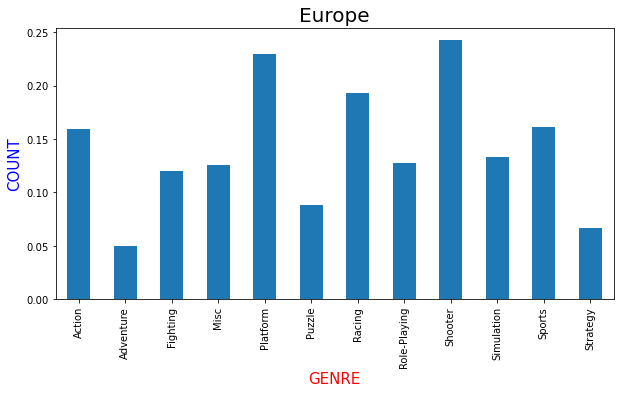

In [24]:
df1.groupby("Genre")["EU_Sales"].mean().plot(kind='bar',figsize=(10,5))
plt.title("Europe", size=20)
plt.xlabel("GENRE",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.show()

#### Shooter genre has highest sales in Europe.

### 3) Japan 

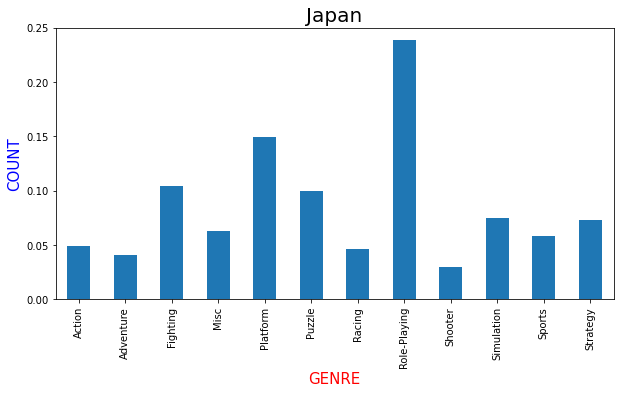

In [25]:
df1.groupby("Genre")["JP_Sales"].mean().plot(kind='bar',figsize=(10,5))
plt.title("Japan", size=20)
plt.xlabel("GENRE",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.show()

#### Role-Playing genre has highest sales in Japan.

### 5) Global sales

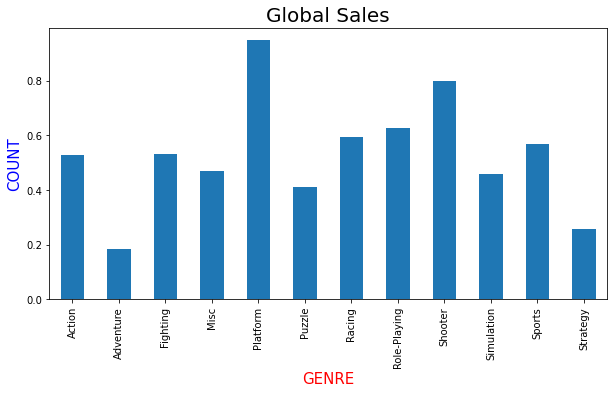

In [26]:
df1.groupby("Genre")["Global_Sales"].mean().plot(kind='bar',figsize=(10,5))
plt.title("Global Sales", size=20)
plt.xlabel("GENRE",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.show()

#### Platform genre has highest sales in Global Sales.

### 4) Others Sales

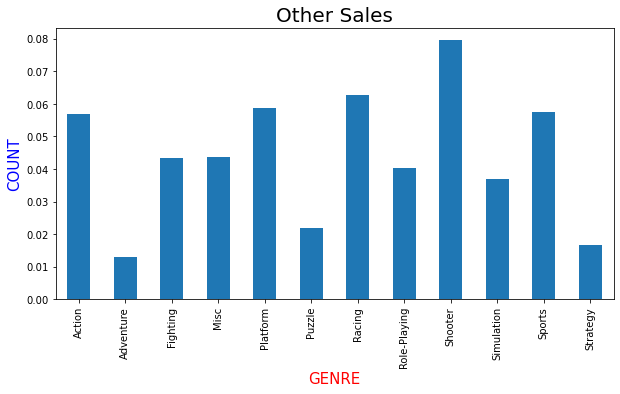

In [27]:
df1.groupby("Genre")["Other_Sales"].mean().plot(kind='bar',figsize=(10,5))
plt.title("Other Sales", size=20)
plt.xlabel("GENRE",fontdict={'fontsize':15,'fontweight':3,'color':'Red'})
plt.ylabel("COUNT",fontdict={'fontsize':15,'fontweight':3,'color':'Blue'})
plt.show()

#### Shooter genre has highest in Other Sales.

## Analyzing which platform is used most in the recent years. 

<AxesSubplot:xlabel='Platform'>

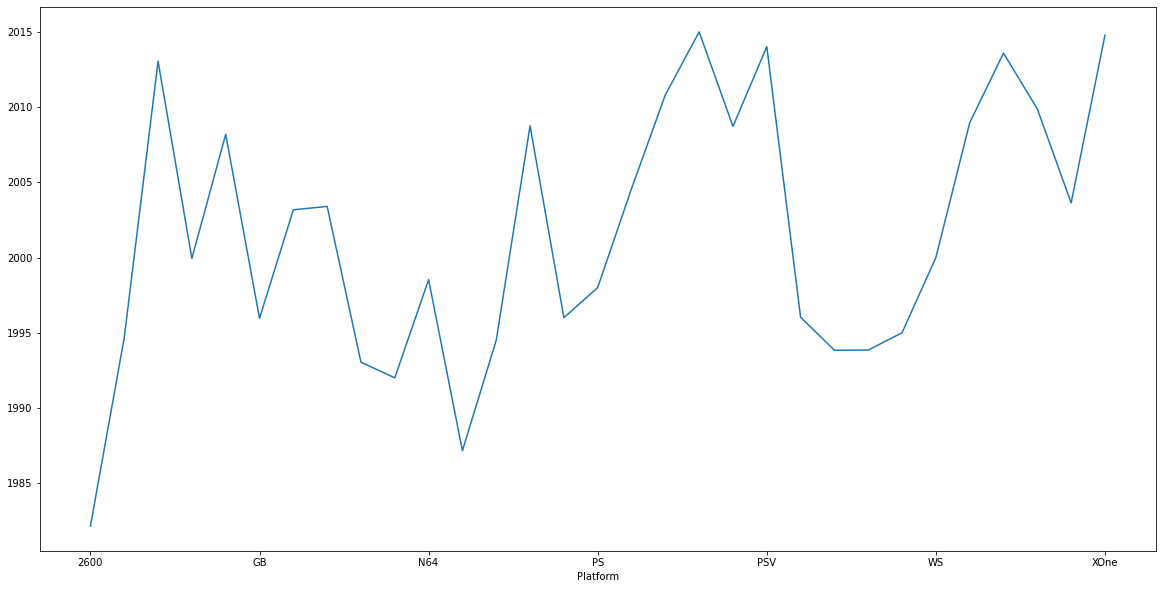

In [28]:
df1.groupby("Platform").mean()['Year'].plot(kind='line',figsize=(20,10))

#### Clearly we can see that mainly  platforms like "PS","PSV","XOne" are used in the recent years.

## Checking if there is any correlation present between other sales and global sales.

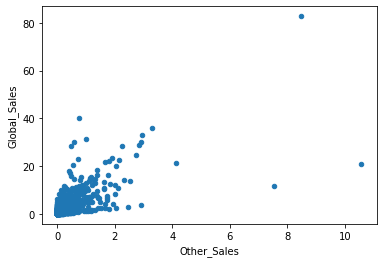

In [29]:
df1.plot.scatter(x="Other_Sales", y="Global_Sales")
plt.show()

## Finding the relation between different types of sales.

<AxesSubplot:>

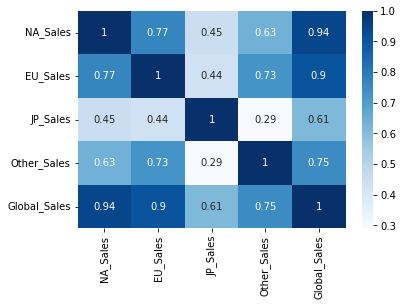

In [30]:
sns.heatmap(df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].corr(),annot=True,cmap="Blues")

#### North-America Sales and Global Sales has the highest relation and Japan Sales and Other Sales has the least relation.

## Finding the relation between sales of three different countries using pairplot.

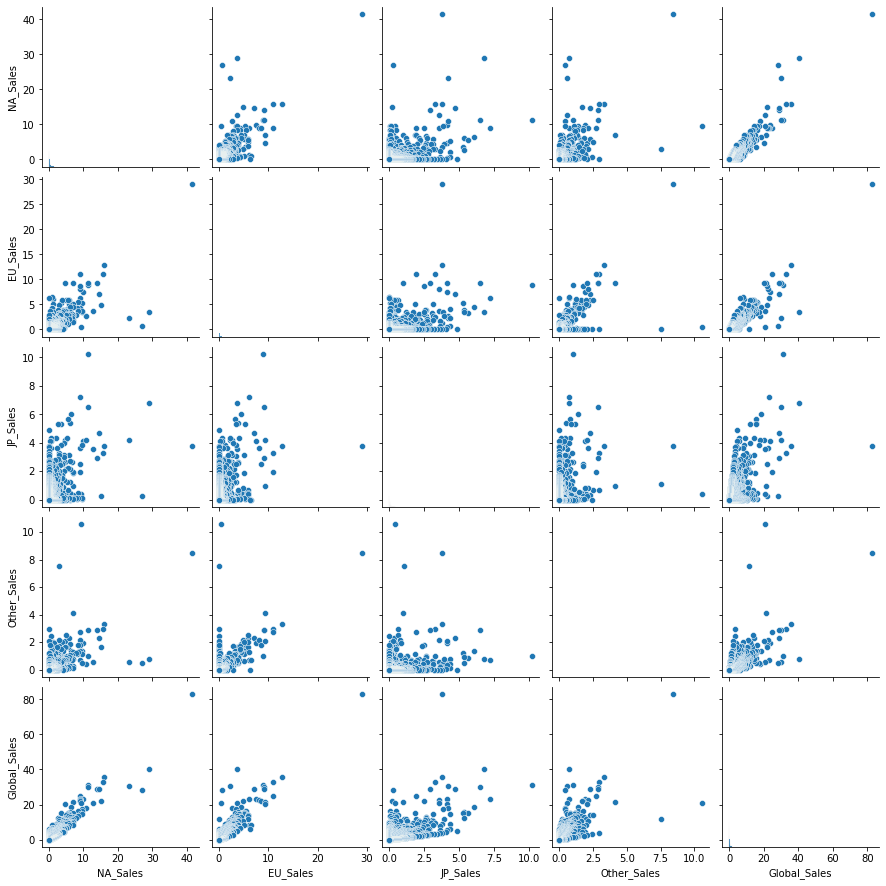

In [31]:
sns.pairplot(data=df1,vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"])
plt.show()

# Conclusion

### This dataset is about the video game sales in different countries. 
### Among the countries north America has the largest number of sales and Japan has the less number of sales. 
### Platform and Role-playing based games has the highest sales.
### Coming to types of video games action genre games are mostly sold and puzzle genre with the least percentage.
### platforms like PS, PSV, XOne are used in the recent years
### From the year 1980-2020 Large number of games are sold in the year 2009 and 2008 less in 2020. 
